In [3]:
import os
import pandas as pd

In [9]:
import pandas as pd
import os

# Set the path to the folder containing the txt files
folder_path = 'src\data\ecb-speeches'

# List all txt files in the folder
txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['date', 'content'])

# Iterate through the txt files and read their content
for txt_file in txt_files:
    # Extract the date from the file name
    date_str = txt_file.split('_')[0]
    date = pd.to_datetime(date_str, format='%Y-%m-%d')
    
    # Read the content of the file
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        content = file.read()
    
    # Append the date and content to the DataFrame
    df = pd.concat([df, pd.DataFrame({'date': [date], 'content': [content]})], ignore_index=True)

# Sort the DataFrame by date
df = df.sort_values(by='date').reset_index(drop=True)


In [10]:
df

,date,content
0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...
2,1998-10-12,Mr. Duisenberg's statement to the European Par...
3,1998-10-12,Mr. Duisenberg speaks on changes in European f...
4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...
...,...,...
2270,2022-02-18,012234\n\n56789 6ÿ6ÿÿ69ÿ96ÿÿ...
2271,2022-02-23,Frank Elderson: Prudential pathways to Paris\n...
2272,2022-02-23,
2273,2022-02-23,Frank Elderson: Towards an immersive superviso...


In [11]:
df.to_csv('src\output\data.csv')

In [12]:
import pandas as pd
df = pd.read_csv('src\output\data.csv')
df.head(20)

,Unnamed: 0,date,content
0,0,1998-07-17,Mr. Duisenberg reports on the outcome of the s...
1,1,1998-09-18,Mr. Duisenberg’s opening statement at the meet...
2,2,1998-10-12,Mr. Duisenberg's statement to the European Par...
3,3,1998-10-12,Mr. Duisenberg speaks on changes in European f...
4,4,1998-10-22,Mr. Duisenberg’s opening statement at the pres...
5,5,1998-11-09,Mr. Duisenberg’s opening statement at the pres...
6,6,1998-11-26,Mr. Duisenberg looks at the international role...
7,7,1998-12-03,Mr Duisenberg reports on the current position ...
8,8,1999-01-08,Mr Duisenberg’s opening statement at the press...
9,9,1999-01-11,Mr Duisenberg’s opening statement at the press...


In [13]:
text = df.iloc[0,2]
text

'Mr. Duisenberg reports on the outcome of the second meeting of the Governing\nCouncil of the European Central Bank Introductory statement by the President of the European\nCentral Bank, Dr. W. Duisenberg, at the press conference held in Frankfurt on 8/7/98.\n\nThe Governing Council first assessed current economic developments in the euro\narea. The general picture is one of continued economic expansion combined with broadly low\ninflation.\nSeveral forecasts made during spring 1998 have even suggested slightly lower\nrates of inflation for 1998-99 compared with expectations in autumn 1997. As far as price\ndevelopments are concerned, inflation as measured by the harmonised consumer price index\n(HICP) is estimated to have risen slightly in April, to 1.4%, but has not increased further in May.\nOutput growth has remained strong in recent quarters, with annual growth rates\nclose to or even exceeding 3%. Economic growth has been driven increasingly by domestic\ndemand rather than net ex

In [1]:
import nltk
nltk.download('punkt')

from transformers import pipeline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
classifier = pipeline(
    "text-classification", model="distilbert-base-uncased-finetuned-sst-2-english"
)
paragraph = df.iloc[0,2]

max_len = 512
paragraph

NameError: name 'df' is not defined

In [33]:
sentiments = []
for chunk in nltk.sent_tokenize(paragraph):
    if len(chunk) <= max_len:
        sentiment = classifier(chunk)[0]
    else:
        subchunks = [chunk[i:i+max_len] for i in range(0, len(chunk), max_len)]
        sentiment = sum(classifier(subchunk)[0]['score'] for subchunk in subchunks) / len(subchunks)
        sentiment = {'label': None, 'score': sentiment}
    sentiments.append({"label": sentiment["label"], "score": sentiment["score"]})

sentiments_df = pd.DataFrame(sentiments) 


In [34]:
sentiments_df

,label,score
0,POSITIVE,0.982439
1,POSITIVE,0.977299
2,POSITIVE,0.981030
3,NEGATIVE,0.990025
4,NEGATIVE,0.974370
...,...,...
72,POSITIVE,0.953033
73,POSITIVE,0.992332
74,POSITIVE,0.971632
75,POSITIVE,0.927429


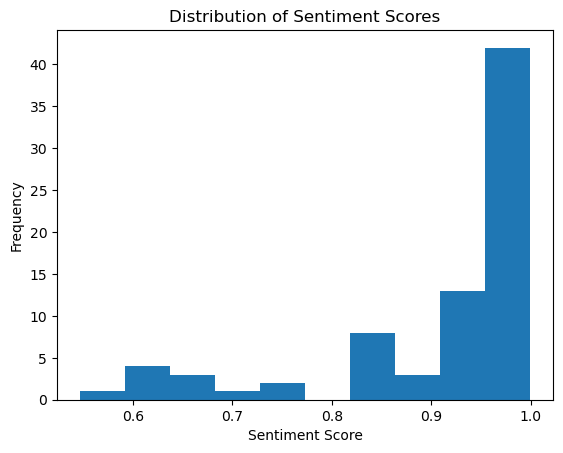

In [35]:
import matplotlib.pyplot as plt

# Extract the scores from the sentiments dataframe
scores = sentiments_df['score'].tolist()

# Create a histogram of the scores
plt.hist(scores, bins=10)

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

# Show the plot
plt.show()


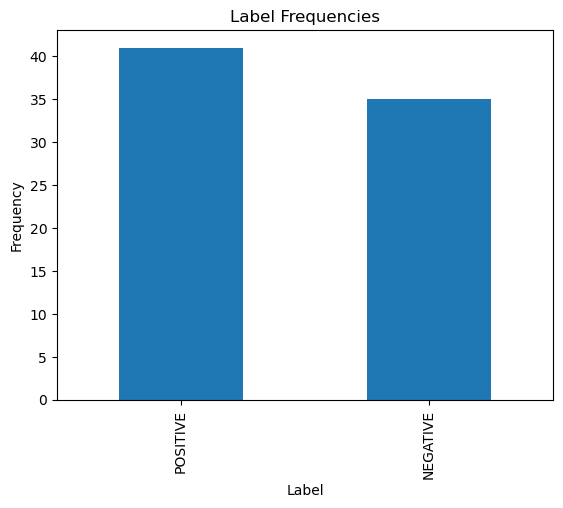

In [39]:
import matplotlib.pyplot as plt

# Extract the scores from the sentiments dataframe
labels = sentiments_df['label'].value_counts()

# Create a histogram of the scores
labels.plot.bar()
plt.title('Label Frequencies')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()
